# Обработка данных

## Подключение библиотек и считывание данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# считываем данные
data = pd.read_csv('../data/cars_data.csv', index_col=0)

data.head()

,id,mark,name,price,params
0,i4126437279,Audi,"Audi Q7 2.0 AT, 2023, 10 км",7500000,"10 км, 2.0 AT (252 л.с.), внедорожник, полный,..."
1,i4094029403,Audi,"Audi Q7 3.0 AT, 2010, 244 000 км",1570000,"244 000 км, 3.0 AT (333 л.с.), внедорожник, по..."
2,i4228945917,Audi,"Audi Q7 3.6 AT, 2010, 240 000 км",2200000,"240 000 км, 3.6 AT (280 л.с.), внедорожник, по..."
3,i4026986935,Audi,"Audi Q7 3.0 AT, 2020, 54 000 км",7650000,"54 000 км, 3.0 AT (249 л.с.), внедорожник, пол..."
4,i4221614908,Audi,"Audi Q7 2.0 AT, 2023, 200 км",9500000,"200 км, 2.0 AT (252 л.с.), внедорожник, полный..."


## Первичная обработка

### Обзор данных

In [3]:
# установим новый индекс
data.set_index('id', inplace=True)

In [4]:
# удалим дубликаты, посмотрим размерность
data.drop_duplicates(keep='first', inplace=True)
data.shape

(17818, 4)

In [5]:
# посмотрим на краткое описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17818 entries, i4126437279 to i4395822541
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mark    17818 non-null  object
 1   name    17818 non-null  object
 2   price   17818 non-null  int64 
 3   params  17818 non-null  object
dtypes: int64(1), object(3)
memory usage: 696.0+ KB


Пропущенных значений нет. Преобразуем признаки

In [6]:
data.sample(n=5)

,mark,name,price,params
id,,,,
i4269936134,ВАЗ (LADA),"ВАЗ (LADA) 2105 1.5 MT, 2007, 80 000 км",250000,"80 000 км, 1.5 MT (71 л.с.), седан, задний, бе..."
i4174510722,Kia,"Kia Rio 1.4 AT, 2011, 120 000 км",899999,"120 000 км, 1.4 AT (107 л.с.), седан, передний..."
i2726256995,Opel,"Opel Astra 1.6 MT, 2006, 287 000 км",401900,"287 000 км, 1.6 MT (105 л.с.), универсал, пере..."
i3814630178,ВАЗ (LADA),"ВАЗ (LADA) Granta 1.6 AT, 2013, 167 212 км",449900,"167 212 км, 1.6 AT (98 л.с.), седан, передний,..."
i3975752007,Hyundai,"Hyundai Solaris 1.6 AT, 2015, 190 000 км",970000,"190 000 км, 1.6 AT (123 л.с.), седан, передний..."


В датасете есть новые автомобили (те, у которых mileage не указан), их учитывать не нужно. Удалим такие записи 

In [7]:
data['name'] = data['name'].apply(lambda x: x if 'км' in x else None)

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(17085, 4)

### Признак - **years_in_operation**

Вытащим из колонки **name** год выпуска автомобиля

In [10]:
data['release year'] = data['name'].apply(lambda x: x.split(', ')[1])

In [11]:
data.sample(n=5)

,mark,name,price,params,release year
id,,,,,
i4087506294,Chevrolet,"Chevrolet Niva 1.7 MT, 2015, 100 461 км",680000,"100 461 км, 1.7 MT (80 л.с.), внедорожник, пол...",2015
i3632249301,Toyota,"Toyota Aqua 1.5 AT, 2019, 34 216 км",1499000,"34 216 км, 1.5 AT (74 л.с.), хетчбэк, передний...",2019
i4093781323,Lexus,"Lexus RX 2.0 AT, 2022, 8 000 км",6250000,"8 000 км, 2 AT (238 л.с.), внедорожник, полный...",2022
i4433915785,Hyundai,"Hyundai Santa Fe 2.4 AT, 2012, 141 981 км",1900000,"141 981 км, 2.4 AT (174 л.с.), внедорожник, по...",2012
i4166792902,Chevrolet,"Chevrolet Niva 1.7 MT, 2010, 173 398 км",677000,"173 398 км, 1.7 MT (80 л.с.), внедорожник, пол...",2010


In [12]:
# Вычтем год выпуска из 2025
data['years_in_operation'] = 2025 - data['release year'].apply(int)

In [13]:
# удалим лишений столбец
data.drop(columns='release year', inplace=True)

### Признак - **is_crashed**

В датасете присутствуют *битые* авто. Сделаем отдельный признак

In [14]:
data['is_crashed'] = data['name'].apply(lambda x: True if 'битый' in x else False)

In [15]:
data.sample(n=5)

,mark,name,price,params,years_in_operation,is_crashed
id,,,,,,
i3851271741,Volkswagen,"Volkswagen T-Cross 1.0 AMT, 2020, 46 750 км",2200000,"46 750 км, 1 AMT (115 л.с.), внедорожник, пере...",5,False
i4165157770,Mitsubishi,"Mitsubishi Outlander 2.0 CVT, 2019, 165 470 км",1951050,"165 470 км, 2.0 CVT (146 л.с.), внедорожник, п...",6,False
i4274567971,ВАЗ (LADA),"ВАЗ (LADA) Largus 1.6 MT, 2020, 59 000 км",1150000,"59 000 км, 1.6 MT (87 л.с.), фургон, передний,...",5,False
i4102914343,Mitsubishi,"Mitsubishi Montero Sport 3.0 AT, 2001, 131 503 км",969900,"131 503 км, 3 AT (177 л.с.), внедорожник, полн...",24,False
i4271871263,Toyota,"Toyota Corolla 1.6 MT, 2005, 304 000 км",550000,"304 000 км, 1.6 MT (110 л.с.), хетчбэк, передн...",20,False


### Признак - **name**

Оставим только название модели

In [16]:
data['name'] = data['name'].apply(lambda x: ' '.join(x.split(', ')[0].split()[:-2]))

In [17]:
data.sample(n=5)

,mark,name,price,params,years_in_operation,is_crashed
id,,,,,,
i4227777219,Chevrolet,Chevrolet Malibu,1530000,"120 000 км, 1.5 AT (160 л.с.), седан, передний...",8,False
i3653095136,Chery,Chery Tiggo 7 Pro,1865000,"61 200 км, 1.5 CVT (147 л.с.), внедорожник, пе...",4,False
i4091885552,Audi,Audi A8,2435000,"119 300 км, 4.2 AT (372 л.с.), седан, полный, ...",15,False
i3988706614,ВАЗ (LADA),ВАЗ (LADA) Vesta,1195000,"98 320 км, 1.6 MT (106 л.с.), универсал, перед...",7,False
i4014559375,Opel,Opel Zafira Life,3300000,"97 000 км, 2.0 AT (150 л.с.), минивэн, передни...",5,False


### Признак - **mileage**

Сначала уберем пометку "Битый" у соответствующих машин из колонки **params**

In [18]:
data['params'] = data['params'].apply(
    lambda x: x.replace("Битый, ", "") if "Битый" in x else x)

Из колонки **params** вытащим mileage

In [19]:
data['mileage'] = data['params'].apply(lambda x: x.split(', ')[0].replace('км', '').replace(' ', ''))

In [20]:
data.sample(n=5)

,mark,name,price,params,years_in_operation,is_crashed,mileage
id,,,,,,,
i4530303839,Kia,Kia Rio,1170000,"87 001 км, 1.4 AT (107 л.с.), седан, передний,...",9,False,87001
i4491877156,Geely,Geely Monjaro,3490000,"2 700 км, 2 AT (238 л.с.), внедорожник, полный...",2,False,2700
i4118065064,ВАЗ (LADA),ВАЗ (LADA) Vesta,1220000,"53 900 км, 1.6 MT (106 л.с.), универсал, перед...",7,False,53900
i3743600664,Toyota,Toyota Avensis,1700000,"170 000 км, 2.0 AT (147 л.с.), седан, передний...",19,False,170000
i4282051714,ВАЗ (LADA),ВАЗ (LADA) Granta,845000,"40 000 км, 1.6 MT (90 л.с.), седан, передний, ...",2,False,40000


### Признаки - **modification**, **body_type**, **drive**, **fuel_type**

**fuel_type** - тип топлива

In [21]:
data['fuel_type'] = data['params'].apply(lambda x: x.split(', ')[-1])

In [22]:
data['fuel_type'].value_counts()

fuel_type
бензин     15066
дизель      1885
гибрид        80
электро       38
газ           16
Name: count, dtype: int64

In [23]:
data.sample(n=5)

,mark,name,price,params,years_in_operation,is_crashed,mileage,fuel_type
id,,,,,,,,
i4021183728,ВАЗ (LADA),ВАЗ (LADA) Granta,269000,"148 121 км, 1.6 MT (87 л.с.), седан, передний,...",12,False,148121,бензин
i4156426104,ВАЗ (LADA),ВАЗ (LADA) Largus,699900,"195 000 км, 1.6 MT (87 л.с.), универсал, перед...",11,False,195000,бензин
i4180296939,Chevrolet,Chevrolet Viva,245000,"300 000 км, 1.8 MT (125 л.с.), седан, передний...",20,False,300000,бензин
i4230082804,Mitsubishi,Mitsubishi Lancer,555000,"270 000 км, 1.6 MT (98 л.с.), седан, передний,...",18,False,270000,бензин
i4053996160,Chevrolet,Chevrolet Cruze,750000,"236 000 км, 1.6 MT (109 л.с.), седан, передний...",13,False,236000,бензин


**drive** - тип привода

In [24]:
data['drive'] = data['params'].apply(lambda x: x.split(', ')[-2])

In [25]:
data['drive'].value_counts()

drive
передний    10351
полный       5461
задний       1273
Name: count, dtype: int64

In [26]:
data.sample(n=5)

,mark,name,price,params,years_in_operation,is_crashed,mileage,fuel_type,drive
id,,,,,,,,,
i4187918441,Chevrolet,Chevrolet Cobalt,1170000,"38 975 км, 1.5 MT (106 л.с.), седан, передний,...",4,False,38975,бензин,передний
i4007853742,Kia,Kia Optima,2350000,"99 000 км, 2.4 AT (188 л.с.), седан, передний,...",7,False,99000,бензин,передний
i4020990455,ВАЗ (LADA),ВАЗ (LADA) Granta,900000,"11 500 км, 1.6 MT (90 л.с.), седан, передний, ...",3,False,11500,бензин,передний
i4043255739,Chery,Chery M11 (A3),295000,"116 099 км, 1.6 MT (117 л.с.), хетчбэк, передн...",15,False,116099,бензин,передний
i4396018673,Mitsubishi,Mitsubishi Pajero,1490000,"203 399 км, 3.0 AT (178 л.с.), внедорожник, по...",18,False,203399,бензин,полный


**body_type** - тип кузова

In [27]:
data['body_type'] = data['params'].apply(lambda x: x.split(', ')[-3])

In [28]:
data['body_type'].value_counts()

body_type
внедорожник            6232
седан                  5635
хетчбэк                2314
универсал               735
фургон                  674
лифтбек                 643
минивэн                 325
пикап                   246
микроавтобус            154
купе                     76
кабриолет                20
1.6 MT хетчбэк            4
2.0 AT внедорожник        2
2.4 AT внедорожник        2
5.7 AT пикап              1
1.5 AT универсал          1
1 AMT хетчбэк             1
2.4 AT седан              1
1.6 MT универсал          1
1 MT хетчбэк              1
1.6 MT седан              1
1.3 MT седан              1
1.6 AT хетчбэк            1
1.6 AMT седан             1
1.8 AMT минивэн           1
2 CVT седан               1
1.8 AT седан              1
1.6 MT минивэн            1
2 CVT внедорожник         1
2.0 CVT седан             1
2 AT внедорожник          1
1.5 CVT седан             1
1.5 MT хетчбэк            1
2.3 AT купе               1
2.2 MT микроавтобус       1
1.6 AT сед

Есть записи, которые спарсились некорректно. Посмотрим, сколько таких.

In [29]:
data['params'].apply(lambda x: len(x.split(', '))).value_counts()

params
5    17054
4       31
Name: count, dtype: int64

Некорретных записей немного, удалим их

In [30]:
data['params'] = data['params'].apply(lambda x: x if len(x.split(', ')) == 5 else None)

In [31]:
data.dropna(inplace=True)

**modification** - модификация (объем двигателя, тип коробки передач, мощность)

In [32]:
data['modification'] = data['params'].apply(lambda x: x.split(', ')[-4])

In [33]:
data.sample(n=5)

,mark,name,price,params,years_in_operation,is_crashed,mileage,fuel_type,drive,body_type,modification
id,,,,,,,,,,,
i4394322447,Kia,Kia Rio,815000,"155 127 км, 1.6 MT (123 л.с.), седан, передний...",13,False,155127,бензин,передний,седан,1.6 MT (123 л.с.)
i4176640618,ВАЗ (LADA),ВАЗ (LADA) Priora,280000,"260 000 км, 1.6 MT (98 л.с.), седан, передний,...",15,False,260000,бензин,передний,седан,1.6 MT (98 л.с.)
i3796122390,Kia,Kia Rio,1280000,"168 020 км, 1.4 AT (100 л.с.), седан, передний...",7,False,168020,бензин,передний,седан,1.4 AT (100 л.с.)
i4250418892,ВАЗ (LADA),ВАЗ (LADA) XRAY,850000,"62 000 км, 1.6 MT (106 л.с.), хетчбэк, передни...",7,False,62000,бензин,передний,хетчбэк,1.6 MT (106 л.с.)
i4229691225,Kia,Kia K5,3090000,"59 500 км, 2.5 AT (194 л.с.), седан, передний,...",4,False,59500,бензин,передний,седан,2.5 AT (194 л.с.)


Удалим лишний теперь столбец **params**

In [34]:
data.drop(columns='params', inplace=True)

### Признак - **engine_capacity**, **transmission_type**, **engine_power**

**engine_capacity** - объем двигателя. Автомобили с электрическим типом двигателя не могут иметь такую характеристику, так как у них в принципе отсутствует камера сгорания топлива, по которой считается объем. Тогда можно сказать, что у электромобилей объем двигателя - 0 л и модель не будет учитывать данный признак

In [35]:
data.loc[data['fuel_type'] == 'электро', 'modification'] = data[data['fuel_type'] == 'электро']['modification'].apply(
    lambda x: '0 ' + x)

In [36]:
data['engine_capacity'] = data['modification'].apply(lambda x: x.split()[0])

**transmission_type** - тип трансмиссии

In [37]:
data['transmission_type'] = data['modification'].apply(lambda x: x.split()[1])

In [38]:
data.sample(n=5)

,mark,name,price,years_in_operation,is_crashed,mileage,fuel_type,drive,body_type,modification,engine_capacity,transmission_type
id,,,,,,,,,,,,
i4529535743,Geely,Geely Monjaro,3300000,2,False,24621,бензин,полный,внедорожник,2 AT (238 л.с.),2,AT
i4013559793,Chevrolet,Chevrolet Aveo,820000,12,False,97300,бензин,передний,седан,1.6 AT (115 л.с.),1.6,AT
i4211580405,ВАЗ (LADA),ВАЗ (LADA) Vesta,1120000,5,False,118506,бензин,передний,универсал,1.6 MT (106 л.с.),1.6,MT
i3848682579,Hyundai,Hyundai Solaris,839990,11,False,121244,бензин,передний,хетчбэк,1.6 AT (123 л.с.),1.6,AT
i4228814149,Chevrolet,Chevrolet Aveo,750000,11,False,223940,бензин,передний,седан,1.6 AT (115 л.с.),1.6,AT


**engine_power** - мощность двигателя

In [39]:
data['engine_power'] = data['modification'].apply(lambda x: x.split('(')[-1].split()[0])

Удалим лишний теперь стоблец **modification**

In [40]:
data.drop(columns='modification', inplace=True)

In [41]:
data.sample(n=5)

,mark,name,price,years_in_operation,is_crashed,mileage,fuel_type,drive,body_type,engine_capacity,transmission_type,engine_power
id,,,,,,,,,,,,
i4179813080,Toyota,Toyota RAV4,2555000,9,False,68000,бензин,передний,внедорожник,2,CVT,146
i3885178193,Skoda,Skoda Octavia,1150000,12,False,140000,бензин,передний,лифтбек,1.6,MT,102
i4173620608,Suzuki,Suzuki Grand Vitara,1190000,13,False,261000,бензин,полный,внедорожник,2.0,MT,140
i4378267779,Haval,Haval F7,1690000,4,False,182329,бензин,полный,внедорожник,2,AMT,190
i4013257381,Toyota,Toyota RAV4,3899000,4,False,34589,бензин,полный,внедорожник,2.0,CVT,149


## Обработка вещественных признаков

### Приведение к типу и описание

In [42]:
# посмотрим, какие колонки нужно преобразовать
data.dtypes

mark                  object
name                  object
price                  int64
years_in_operation     int64
is_crashed              bool
mileage               object
fuel_type             object
drive                 object
body_type             object
engine_capacity       object
transmission_type     object
engine_power          object
dtype: object

Приведем колонки **Год выпуска**, **mileage**, **Объём двигателя**, **engine_power** к числовому типу

In [43]:
cols_to_num = ['mileage', 'engine_capacity', 'engine_power']
data[cols_to_num] = data[cols_to_num].map(pd.to_numeric)

In [44]:
data.sample(n=5)

,mark,name,price,years_in_operation,is_crashed,mileage,fuel_type,drive,body_type,engine_capacity,transmission_type,engine_power
id,,,,,,,,,,,,
i4173603259,Toyota,Toyota Corolla,710000,19,False,283000,бензин,передний,универсал,1.6,MT,110
i4032505766,ВАЗ (LADA),ВАЗ (LADA) Largus,935000,7,False,124000,бензин,передний,универсал,1.6,MT,106
i3915343840,Nissan,Nissan X-Trail,1550000,15,False,150000,бензин,полный,внедорожник,2.0,CVT,141
i3598125201,Hyundai,Hyundai Elantra,2300000,2,False,47000,бензин,передний,седан,1.6,AT,128
i4276341139,Opel,Opel Astra,800000,11,False,150000,бензин,передний,хетчбэк,1.6,MT,115


In [45]:
# Посмотрим на описание числовых признаков
data.describe()

,price,years_in_operation,mileage,engine_capacity,engine_power
count,1.705400e+04,17054.000000,17054.000000,17054.000000,17054.000000
mean,1.607883e+06,11.475314,145239.819749,1.944594,139.076522
std,1.797618e+06,6.972494,92419.328182,0.634980,59.111816
min,2.255500e+04,1.000000,1.000000,0.000000,20.000000
25%,6.500000e+05,6.000000,80000.000000,1.600000,105.000000
50%,1.140000e+06,11.000000,137000.000000,1.600000,123.000000
75%,1.930000e+06,15.000000,196267.250000,2.000000,150.000000
max,3.450000e+07,103.000000,1000000.000000,6.200000,625.000000


### Обработка выбросов

Напишем функцию, которая будет возвращать верхнюю и нижнюю границу усиков `boxplot`

In [46]:
def low_up_bounds(feature, coef=1.5):
    # Расчитаем длину усиков
    q_low = data[feature].quantile(0.25)
    q_high = data[feature].quantile(0.75)

    tentacle_length = q_high - q_low

    # вычислим верхнюю и нижнюю границы
    upper_tentacle = q_high + coef * tentacle_length
    lower_tentacle = q_low - coef * tentacle_length

    return lower_tentacle, upper_tentacle

Признак - **years_in_operation**

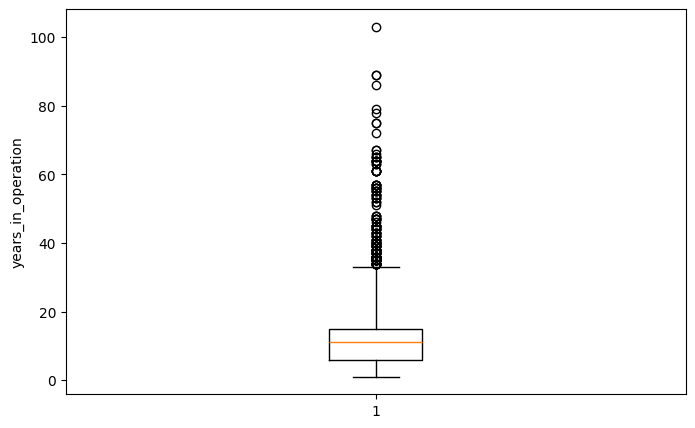

In [47]:
fig = plt.figure()
fig.set_size_inches(8, 5)

plt.boxplot(data['years_in_operation'], whis=2)
plt.ylabel('years_in_operation')

plt.show()

In [48]:
# посмотрим, сколько выбросов
low_year, up_year = low_up_bounds('years_in_operation', 2)

data[data['years_in_operation'] > int(up_year)].shape[0]

177

In [49]:
# удалим выбросы
data = data[data['years_in_operation'] <= int(up_year)]

In [50]:
data.shape

(16877, 12)

Признак - **mileage**

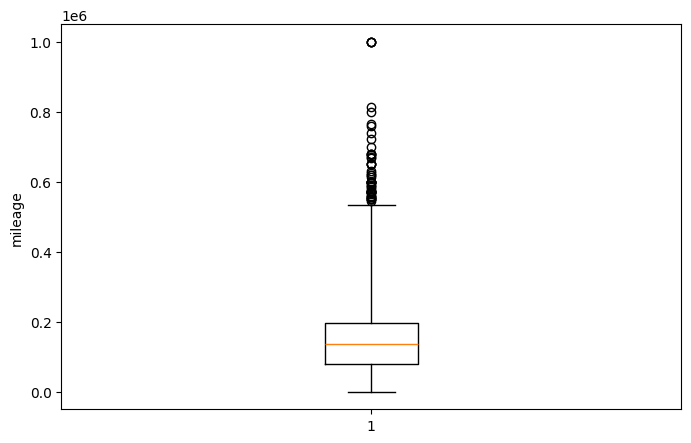

In [51]:
fig = plt.figure()
fig.set_size_inches(8, 5)

plt.boxplot(data['mileage'], whis=3)
plt.ylabel('mileage')

plt.show()

In [52]:
# посмотрим, сколько выбросов
low, up = low_up_bounds('mileage', 3)

data[data['mileage'] >= int(up)].shape[0]

55

In [53]:
# удалим выбросы
data = data[data['mileage'] < int(up)]

In [54]:
data.shape

(16822, 12)

Признак - **price**

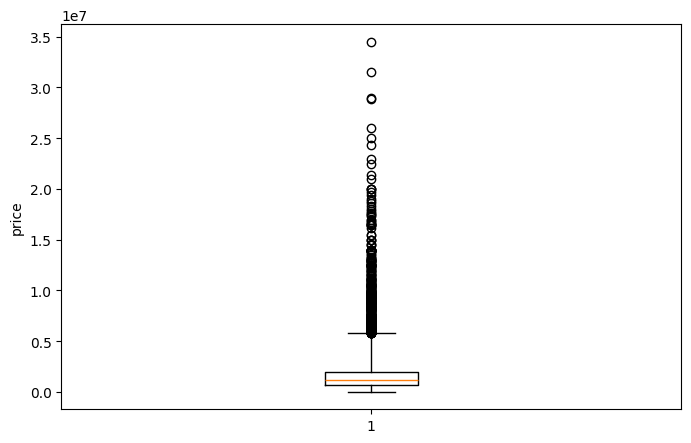

In [55]:
fig = plt.figure()
fig.set_size_inches(8, 5)

plt.boxplot(data['price'], whis=3)
plt.ylabel('price')

plt.show()

In [56]:
# посмотрим, сколько выбросов
low, up = low_up_bounds('price', 3)

data[data['price'] >= int(up)].shape[0]

459

По цене будем удалять выбросы с увеличенной длиной усов

In [57]:
data = data[data['price'] <= up]

In [58]:
data.shape

(16367, 12)

Признаки - **engine_power** и **engine_capacity**

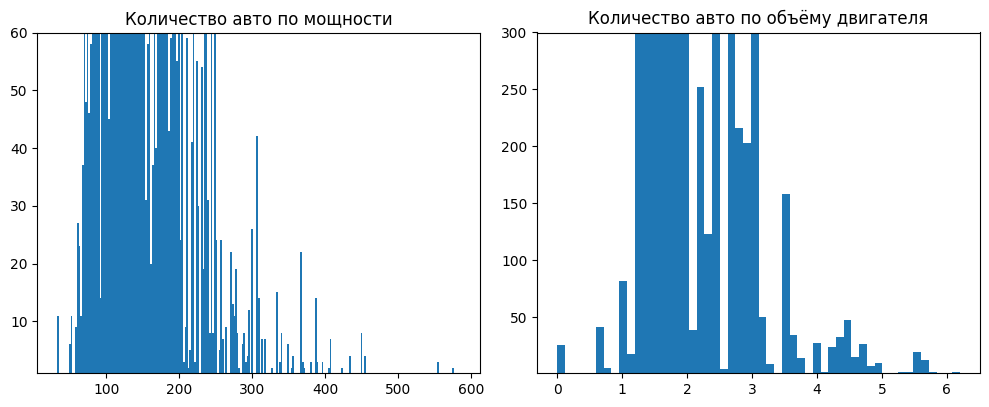

In [59]:
fig = plt.figure()

fig.set_size_inches(10, 4)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(data['engine_power'], bins=data['engine_power'].unique().shape[0])
plt.ylim((1, 60))

ax_2 = fig.add_subplot(1, 2, 2)
plt.hist(data['engine_capacity'], bins=data['engine_capacity'].unique().shape[0])
plt.ylim((1, 300))

fig.tight_layout()

ax_1.set(title = 'Количество авто по мощности')
ax_2.set(title = 'Количество авто по объёму двигателя')

plt.show()

Удалим авто с мощностью больше 500 л.с. и объемом двигателя больше 6 л

In [60]:
data = data[(data['engine_power'] <= 500) & (data['engine_capacity'] <= 6)]

Посмотрим на матрицу корелляций числовых признаков

In [61]:
# берем столбцы, содержащие числовой тип
numeric_columns = data.loc[:,data.dtypes!=object].columns

In [62]:
# посмотрим корелляции
data[numeric_columns].corr()

,price,years_in_operation,is_crashed,mileage,engine_capacity,engine_power
price,1.000000,-0.578439,-0.106730,-0.400222,0.400903,0.642576
years_in_operation,-0.578439,1.000000,0.102565,0.634217,0.089909,-0.120383
is_crashed,-0.106730,0.102565,1.000000,0.072112,-0.011755,-0.033320
mileage,-0.400222,0.634217,0.072112,1.000000,0.175917,0.002674
engine_capacity,0.400903,0.089909,-0.011755,0.175917,1.000000,0.713972
engine_power,0.642576,-0.120383,-0.033320,0.002674,0.713972,1.000000


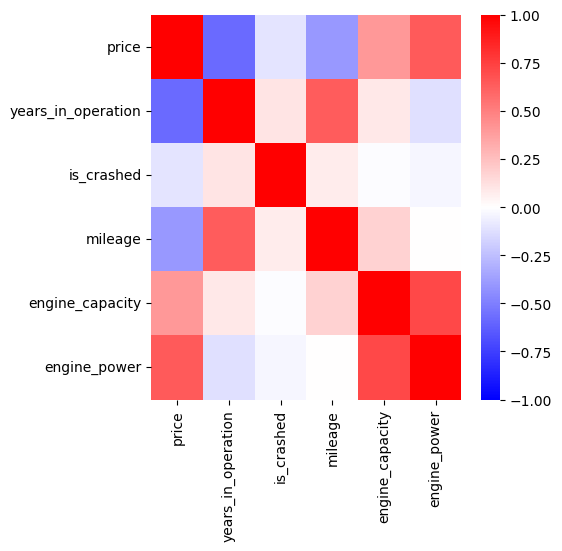

In [63]:
# сделаем тепловую карту
fig = plt.figure()
fig.set_size_inches(5, 5)

corr_matrix = data[numeric_columns].corr()

sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            cmap='bwr',
            vmin=-1,
            vmax=+1)

plt.show()

## Обработка категориальных признаков

### Признак - **is_crashed**

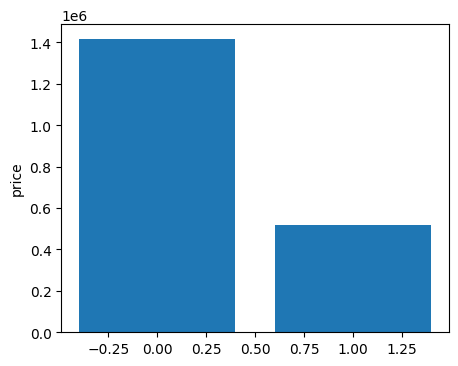

In [64]:
# проверим зависимость, 1 - машина битая, 0 - не битая
fig = plt.figure()

fig.set_size_inches(5, 4)

plt.bar(sorted(list(data['is_crashed'].unique())),
        data.groupby('is_crashed')['price'].mean().values)

plt.ylabel('price')

plt.show()

### Признак - **fuel_type**

In [65]:
data['fuel_type'].value_counts()

fuel_type
бензин     14630
дизель      1613
гибрид        72
электро       26
газ           14
Name: count, dtype: int64

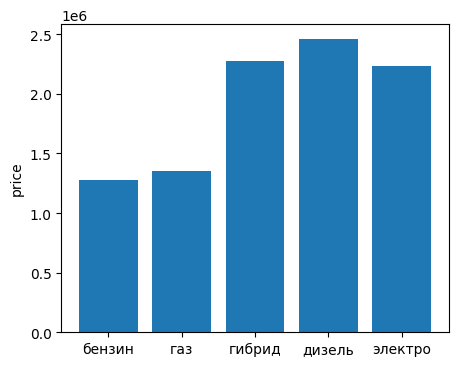

In [66]:
# проверим зависимость
fig = plt.figure()

fig.set_size_inches(5, 4)

plt.bar(sorted(list(data['fuel_type'].unique())),
        data.groupby('fuel_type')['price'].mean().values)

plt.ylabel('price')

plt.show()

Так как значения столбцов на русском языке, переименуем названия колонок

In [67]:
data.rename(columns={'mark': 'марка', 'name': 'название', 'price': 'цена',
            'years_in_operation': 'лет в эксплуатации', 'is_crashed': 'битый', 'mileage': 'пробег', 
            'fuel_type': 'тип топлива', 'drive': 'привод', 'body_type': 'тип кузова', 'engine_capacity': 'объем двигателя',
            'transmission_type': 'тип трансмиссии', 'engine_power': 'мощность двигателя'}, inplace=True)

In [68]:
# декодируем признак с помощью One Hot
fuel_types = pd.get_dummies(data['тип топлива'], prefix='тип топлива', prefix_sep=' - ')

In [69]:
# добавим новые столбы, удалим лишние для устранения мультиколлинеарности
data = pd.concat([data, fuel_types], axis=1).drop(columns=['тип топлива', 'тип топлива - электро'])

In [70]:
data.sample(n=5)

,марка,название,цена,лет в эксплуатации,битый,пробег,привод,тип кузова,объем двигателя,тип трансмиссии,мощность двигателя,тип топлива - бензин,тип топлива - газ,тип топлива - гибрид,тип топлива - дизель
id,,,,,,,,,,,,,,,
i4369956682,Nissan,Nissan Qashqai,760000,17,False,262003,передний,внедорожник,1.6,MT,114,True,False,False,False
i4228965121,Nissan,Nissan Qashqai,749000,17,False,217000,передний,внедорожник,1.6,MT,114,True,False,False,False
i4192611392,ВАЗ (LADA),ВАЗ (LADA) Granta,425000,9,False,190880,передний,седан,1.6,MT,87,True,False,False,False
i4010992841,Nissan,Nissan X-Trail,1360000,13,False,143709,полный,внедорожник,2.0,CVT,141,True,False,False,False
i4025185265,Honda,Honda Stepwgn,2729999,6,False,78609,передний,минивэн,1.5,CVT,150,True,False,False,False


### Признак - **тип трансмиссии**

In [71]:
data['тип трансмиссии'].value_counts()

тип трансмиссии
MT     7828
AT     5840
CVT    1410
AMT    1277
Name: count, dtype: int64

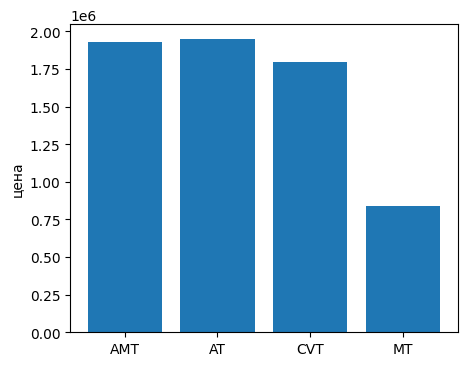

In [72]:
# проверим зависимость
fig = plt.figure()

fig.set_size_inches(5, 4)

plt.bar(sorted(list(data['тип трансмиссии'].unique())),
        data.groupby('тип трансмиссии')['цена'].mean().values)

plt.ylabel('цена')

plt.show()

In [73]:
# декодируем признак с помощью One Hot
encoded = pd.get_dummies(data['тип трансмиссии'], prefix='тип трансмиссии', prefix_sep=' - ')

In [74]:
# добавим новые столбы, удалим лишние для устранения мультиколлинеарности
data = pd.concat([data, encoded], axis=1).drop(columns=['тип трансмиссии', 'тип трансмиссии - AMT'])

In [75]:
data.sample(n=5)

,марка,название,цена,лет в эксплуатации,битый,пробег,привод,тип кузова,объем двигателя,мощность двигателя,тип топлива - бензин,тип топлива - газ,тип топлива - гибрид,тип топлива - дизель,тип трансмиссии - AT,тип трансмиссии - CVT,тип трансмиссии - MT
id,,,,,,,,,,,,,,,,,
i4161476366,ВАЗ (LADA),ВАЗ (LADA) 2114 Samara,235000,14,False,179665,передний,хетчбэк,1.6,81,True,False,False,False,False,False,True
i3939513091,УАЗ,УАЗ 3909,120000,27,False,100000,полный,микроавтобус,2.9,74,True,False,False,False,False,False,True
i4024123368,Volkswagen,Volkswagen Tiguan,1500000,12,False,185000,полный,внедорожник,2.0,170,True,False,False,False,True,False,False
i4311534092,Kia,Kia Sportage,2220000,8,False,69000,полный,внедорожник,2.0,150,True,False,False,False,True,False,False
i3975850358,Mitsubishi,Mitsubishi ASX,999000,12,False,250844,передний,внедорожник,1.8,140,True,False,False,False,False,True,False


### Признак - **тип кузова**

In [76]:
data['тип кузова'].value_counts()

тип кузова
внедорожник     5796
седан           5498
хетчбэк         2300
универсал        727
фургон           646
лифтбек          637
минивэн          304
пикап            229
микроавтобус     139
купе              62
кабриолет         17
Name: count, dtype: int64

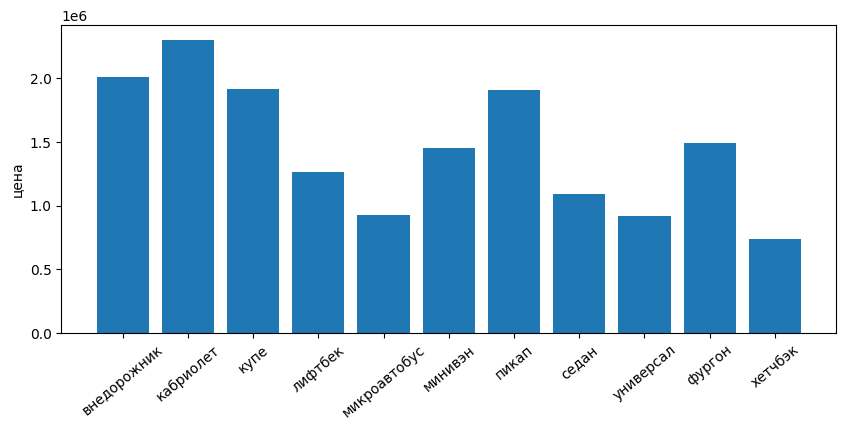

In [77]:
# проверим зависимость
fig = plt.figure()

fig.set_size_inches(10, 4)

plt.bar(sorted(list(data['тип кузова'].unique())),
        data.groupby('тип кузова')['цена'].mean().values)

plt.ylabel('цена')
plt.xticks(rotation=40)

plt.show()

In [78]:
# декодируем признак с помощью One Hot
encoded = pd.get_dummies(data['тип кузова'], prefix='тип кузова', prefix_sep=' - ')

In [79]:
# добавим новые столбы, удалим лишние для устранения мультиколлинеарности
data = pd.concat([data, encoded], axis=1).drop(columns=['тип кузова', 'тип кузова - кабриолет'])

In [80]:
data.sample(n=5)

,марка,название,цена,лет в эксплуатации,битый,пробег,привод,объем двигателя,мощность двигателя,тип топлива - бензин,...,тип кузова - внедорожник,тип кузова - купе,тип кузова - лифтбек,тип кузова - микроавтобус,тип кузова - минивэн,тип кузова - пикап,тип кузова - седан,тип кузова - универсал,тип кузова - фургон,тип кузова - хетчбэк
id,,,,,,,,,,,,,,,,,,,,,
i3918328019,Chevrolet,Chevrolet Lacetti,550000,14,False,139000,передний,1.4,94,True,...,False,False,False,False,False,False,True,False,False,False
i4075660116,ВАЗ (LADA),ВАЗ (LADA) Largus,1290000,4,False,111931,передний,1.6,90,True,...,False,False,False,False,False,False,False,False,True,False
i3948392109,ГАЗ,ГАЗ ГАЗель Next,2070000,7,False,297125,задний,2.7,107,True,...,False,False,False,False,False,False,False,False,True,False
i4160725829,Nissan,Nissan Tiida,600000,18,False,203000,передний,1.6,110,True,...,False,False,False,False,False,False,False,False,False,True
i4074575230,ВАЗ (LADA),ВАЗ (LADA) Kalina,350000,16,False,72000,передний,1.4,89,True,...,False,False,False,False,False,False,True,False,False,False


### Признак - **привод**

In [81]:
data['привод'].value_counts()

привод
передний    10272
полный       4940
задний       1143
Name: count, dtype: int64

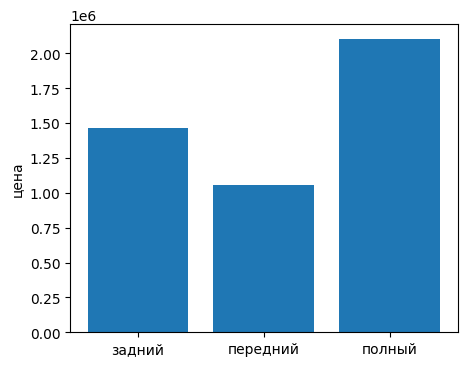

In [82]:
# проверим зависимость
fig = plt.figure()

fig.set_size_inches(5, 4)

plt.bar(sorted(list(data['привод'].unique())),
        data.groupby('привод')['цена'].mean().values)

plt.ylabel('цена')

plt.show()

In [83]:
# декодируем признак с помощью One Hot
encoded = pd.get_dummies(data['привод'], prefix='привод', prefix_sep=' - ')

In [84]:
# добавим новые столбы, удалим лишние для устранения мультиколлинеарности
data = pd.concat([data, encoded], axis=1).drop(columns=['привод', 'привод - полный'])

In [85]:
data.sample(n=5)

,марка,название,цена,лет в эксплуатации,битый,пробег,объем двигателя,мощность двигателя,тип топлива - бензин,тип топлива - газ,...,тип кузова - лифтбек,тип кузова - микроавтобус,тип кузова - минивэн,тип кузова - пикап,тип кузова - седан,тип кузова - универсал,тип кузова - фургон,тип кузова - хетчбэк,привод - задний,привод - передний
id,,,,,,,,,,,,,,,,,,,,,
i4229522095,Toyota,Toyota Yaris,209000,26,False,176000,1.0,68,True,False,...,False,False,False,False,False,False,False,True,False,True
i4093501171,Mitsubishi,Mitsubishi Lancer,800000,18,False,62261,1.6,98,True,False,...,False,False,False,False,True,False,False,False,False,True
i3638880427,Mitsubishi,Mitsubishi Eclipse Cross,3850000,2,False,1,1.5,150,True,False,...,False,False,False,False,False,False,False,False,False,False
i4271814998,Hyundai,Hyundai Creta,1850000,6,False,35000,1.6,123,True,False,...,False,False,False,False,False,False,False,False,False,True
i4094628379,Opel,Opel Insignia,1150000,12,False,210000,1.6,170,True,False,...,False,False,False,False,True,False,False,False,False,True


### Признаки - **название** и **марка**

In [86]:
# декодируем признаки с помощью Target Encoding - заменим значения на медианы
data['название'] = data.groupby('название')['цена'].transform('median')
data['марка'] = data.groupby('марка')['цена'].transform('median')

## Сохранение данных

In [87]:
data.sample(n=5)

,марка,название,цена,лет в эксплуатации,битый,пробег,объем двигателя,мощность двигателя,тип топлива - бензин,тип топлива - газ,...,тип кузова - лифтбек,тип кузова - микроавтобус,тип кузова - минивэн,тип кузова - пикап,тип кузова - седан,тип кузова - универсал,тип кузова - фургон,тип кузова - хетчбэк,привод - задний,привод - передний
id,,,,,,,,,,,,,,,,,,,,,
i3693116272,999000.0,1639000.0,1798000,7,False,126000,2.0,143,True,False,...,False,False,False,False,False,False,False,False,False,False
i3501094121,1300000.0,2899500.0,2900000,17,False,107740,2.0,295,True,False,...,False,False,False,False,True,False,False,False,False,False
i4250205587,726000.0,669995.0,650000,18,False,179000,1.8,140,True,False,...,False,False,False,False,False,False,False,True,False,True
i4087057206,560000.0,994500.0,1115000,2,False,7800,1.6,106,True,False,...,False,False,False,False,False,True,False,False,False,True
i4206295319,1245000.0,1300000.0,1797000,4,False,108900,1.4,125,True,False,...,True,False,False,False,False,False,False,False,False,True


In [88]:
# сохраним обработанные данные 
data.to_csv('../data/processed_data.csv', sep=';')